**Name of Student** :- Gauri Kishor Damle\
**NUID**:- 002931881

# **IE 6600 : Data Visualization and Computation**

**Content**

1. Title page 

2. Introduction

3. Problem statement

4. Data used

5. Analysis flow

6. Analysis

7. Conclusion



# **Introduction**

E-commerce is growing at fast pace. In E-commerce applications/websites customers provide feedback/rating while returning order. This generates large size of raw data. When dealing with such velocity and volume of big data to hold customers it is important to do analysis of sales data at evry six months. Thus, understanding and then making sense out of these historical sales is an important problem to be looked at.

Problem definition: The purpose of the analysis is to focus on how product sales data to be utilized to derive business insights. Web dashboard is presented as ouput to suggests based on multiple features if following product will be sold or not. 


# **Problem statement**

#### **Problem Defination:** Given a dataset with records of sold and unsold products, objective is to build a binary classification model which learns from features and suggests if a particular product will be in sold category ot not.

#### This output is helpful to know if we should continue to sell or we should remeove a particular product from the inventory.

#### Prediction is binary classification model which multiple categorical and continuous features/inputs 


#### It then tries to predict the sold flag in binary form 1 or 0. 
 
1.  1 indicates - continue selling the product
2.  0 means - discard the product

Machine Learning Models used :
1. Random forest classification model
2. XGBoost classifier model



# **Data Used**

Attached is a set of products in which we are trying to determine which products we should continue to sell, and which products to remove from our inventory. 

The file contains BOTH historical sales data AND active inventory, which can be discerned with the column titled "File Type".

Each row in the file represents one product.It is important to note that we have MANY products in our inventory, and very few of them tend to sell (only about 10% sell each year) and many of the products only have a single sale in the course of a year

SKU_number: This is the unique identifier for each product.\
Order: Just a sequential counter.\
SoldFlag: 1 = sold in past 6 mos. 0 = Not sold\
MarketingType = Two categories of how we market the product.\
NewReleaseFlag = Any product that has had a future release (i.e., Release Number > 1)


The kaggle dataset file from internet with URL = https://www.kaggle.com/datasets/flenderson/sales-analysis/code



In [ ]:
## Import required libraries
import os
import re
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
from operator import itemgetter
from typing import Dict, Tuple, List, Set


## plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio


## visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
!pip install bokeh
from bokeh.plotting import figure, output_notebook, show

  
## data preprocessing 
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

## machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import plot_roc_curve, confusion_matrix



## model evaluation
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

## warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration import Configuration, ConfigurationError
  File "/usr/local/lib/python3.7/dist-packages/pip/_intern

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SemesterTwo/6600/6600ComputationAndVisualization/Project 2/SalesKaggle3.csv')

#**Data Cleaning and Preprocessing**

In [ ]:
print (df.shape)

(198917, 14)


In [ ]:
print("Size of Data is : " + str(df.size))

Size of Data is : 2784838


In [ ]:
print("Data types of Dataset \n\n" + str(df.dtypes))



Data types of Dataset 

Order                 int64
File_Type            object
SKU_number            int64
SoldFlag            float64
SoldCount           float64
MarketingType        object
ReleaseNumber         int64
New_Release_Flag      int64
StrengthFactor      float64
PriceReg            float64
ReleaseYear           int64
ItemCount             int64
LowUserPrice        float64
LowNetPrice         float64
dtype: object


In [ ]:
print("Data Information")
df.info()

Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [ ]:
print("Summary of data")

df.describe().round(2).T.style.background_gradient(
    vmin=-1, vmax=1, cmap=sns.color_palette("RdYlGn", as_cmap=True))

Summary of data


In [ ]:
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [ ]:
"""61 % null values found in sold count column"""
100*df.isna().sum()/df.shape[0]

Order                0.000000
File_Type            0.000000
SKU_number           0.000000
SoldFlag            61.795121
SoldCount           61.795121
MarketingType        0.000000
ReleaseNumber        0.000000
New_Release_Flag     0.000000
StrengthFactor       0.000000
PriceReg             0.000000
ReleaseYear          0.000000
ItemCount            0.000000
LowUserPrice         0.000000
LowNetPrice          0.000000
dtype: float64

In [ ]:
df.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [ ]:
df['File_Type'].value_counts()

Active        122921
Historical     75996
Name: File_Type, dtype: int64

In [ ]:
df_active = df[df["File_Type"]=="Active"]
df_historical = df[df["File_Type"]=="Historical"]

In [ ]:
df_active["SoldFlag"].isna().sum()

122921

#### The null values in sold flag and sold count are coming from Active inventory.

#### As the Active inventory does not have sold flag/labels they are not used for model training.

# **EDA**

In [ ]:
df_historical

Order   File_Type  SKU_number  SoldFlag  SoldCount MarketingType  \
0          2  Historical     1737127       0.0        0.0             D   
1          3  Historical     3255963       0.0        0.0             D   
2          4  Historical      612701       0.0        0.0             D   
3          6  Historical      115883       1.0        1.0             D   
4          7  Historical      863939       1.0        1.0             D   
...      ...         ...         ...       ...        ...           ...   
75991  85102  Historical      863599       0.0        0.0             S   
75992  85103  Historical      614304       0.0        0.0             S   
75993  85104  Historical      109021       0.0        0.0             S   
75994  85105  Historical      658242       0.0        0.0             S   
75995  85106  Historical     2538340       0.0        0.0             S   

       ReleaseNumber  New_Release_Flag  StrengthFactor  PriceReg  ReleaseYear  \
0                 15                 1        682743.0     44.99         2015   
1                  7                 1       1016014.0     24.81         2005   
2                  0                 0        340464.0     46.00         2013   
3                  4                 1        334011.0    100.00         2006   
4                  2                 1       1287938.0    121.95         2010   
...              ...               ...             ...       ...          ...   
75991              2                 1        119056.0     64.99         2008   
75992              6                 1       1115312.0     21.50         2004   
75993              7                 1       1315446.0    142.75         2006   
75994              2                 1        877788.0     50.00         2012   
75995              2                 1        500956.0     46.95         2001   

       ItemCount  LowUserPrice  LowNetPrice  
0              8         28.97        31.84  
1             39          0.00        15.54  
2             34         30.19        27.97  
3             20        133.93        83.15  
4             28          4.00        23.99  
...          ...           ...          ...  
75991         34         32.49        53.00  
75992         53         47.99        21.97  
75993         19         47.99        53.99  
75994         21         27.07        32.62  
75995         23          0.00        37.89  

[75996 rows x 14 columns]

In [ ]:
df_historical.shape

(75996, 14)

In [ ]:
df_historical.describe()

Order    SKU_number      SoldFlag     SoldCount  ReleaseNumber  \
count  75996.000000  7.599600e+04  75996.000000  75996.000000   75996.000000   
mean   41649.886362  6.522446e+05      0.171009      0.322306       4.152534   
std    25041.351458  6.862036e+05      0.376519      1.168615       3.950739   
min        2.000000  5.000100e+04      0.000000      0.000000       0.000000   
25%    19440.750000  1.700568e+05      0.000000      0.000000       2.000000   
50%    41566.500000  5.409220e+05      0.000000      0.000000       3.000000   
75%    63489.500000  7.592552e+05      0.000000      0.000000       6.000000   
max    85106.000000  3.959831e+06      1.000000     73.000000      99.000000   

       New_Release_Flag  StrengthFactor      PriceReg   ReleaseYear  \
count      75996.000000    7.599600e+04  75996.000000  75996.000000   
mean           0.789068    1.222439e+06     98.730594   2005.973341   
std            0.407973    1.540521e+06     78.712358      6.113771   
min            0.000000    6.800000e+01      0.000000   1935.000000   
25%            1.000000    2.446812e+05     49.950000   2003.000000   
50%            1.000000    7.160165e+05     78.950000   2007.000000   
75%            1.000000    1.554032e+06    127.000000   2010.000000   
max            1.000000    1.666966e+07   3986.310000   2017.000000   

          ItemCount  LowUserPrice   LowNetPrice  
count  75996.000000  75996.000000  75996.000000  
mean      43.843637     56.708431     47.186160  
std       37.362231    104.758351    129.814719  
min        0.000000      0.000000      0.000000  
25%       22.000000     20.490000     18.740000  
50%       34.000000     44.030000     36.130000  
75%       53.000000     79.380000     56.920000  
max     1523.000000  14140.210000  19138.790000

In [ ]:
df_historical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75996 entries, 0 to 75995
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order             75996 non-null  int64  
 1   File_Type         75996 non-null  object 
 2   SKU_number        75996 non-null  int64  
 3   SoldFlag          75996 non-null  float64
 4   SoldCount         75996 non-null  float64
 5   MarketingType     75996 non-null  object 
 6   ReleaseNumber     75996 non-null  int64  
 7   New_Release_Flag  75996 non-null  int64  
 8   StrengthFactor    75996 non-null  float64
 9   PriceReg          75996 non-null  float64
 10  ReleaseYear       75996 non-null  int64  
 11  ItemCount         75996 non-null  int64  
 12  LowUserPrice      75996 non-null  float64
 13  LowNetPrice       75996 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 8.7+ MB


In [ ]:
df_historical.isnull().sum()

Order               0
File_Type           0
SKU_number          0
SoldFlag            0
SoldCount           0
MarketingType       0
ReleaseNumber       0
New_Release_Flag    0
StrengthFactor      0
PriceReg            0
ReleaseYear         0
ItemCount           0
LowUserPrice        0
LowNetPrice         0
dtype: int64

#### This forms training dataset with multiple input features and target = SoldFlag.\
#### SoldFlag = if a given product is been sold for last 6 months or not.

#### Encoding categorical features using label encoder

In [ ]:
le = LabelEncoder()
df_historical["MarketingType"] = le.fit_transform(df_historical["MarketingType"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_historical = df_historical.drop(["Order","SKU_number", "File_Type"], axis=1)

In [ ]:
## shuffle the Dataset
df_historical = df_historical.sample(frac=1.0, random_state=1)

#### corelated features

In [ ]:
!pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 162 kB 4.4 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 964 kB 16.0 MB/s 
     |████████████████████████████████| 2.3 MB 35.7 MB/s 
     |████████████████████████████████| 51 kB 355 kB/s 
     |████████████████████████████████| 47 kB 2.3 MB/s 
     |████████████████████████████████| 144 kB 42.3 MB/s 
     |████████████████████████████████| 5.8 MB 32.8 MB/s 
     |████████████████████████████████| 251 kB 42.4 MB/s 
     |████████████████████████████████| 3.2 MB 37.3 MB/s 
     |████████████████████████████████| 90 kB 4.9 MB/s 
     |████████████████████████████████| 121 kB 12.3 MB/s 
     |████████████████████████████████| 100 kB 4.5 MB/s 
     |████████████████████████████████| 84 kB 1.2 MB/s 
     |████████████████████████████████| 127 kB 36.6 MB/s 
     |████████████████████████████████| 60 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['figure', 'time', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 
Computing correlation


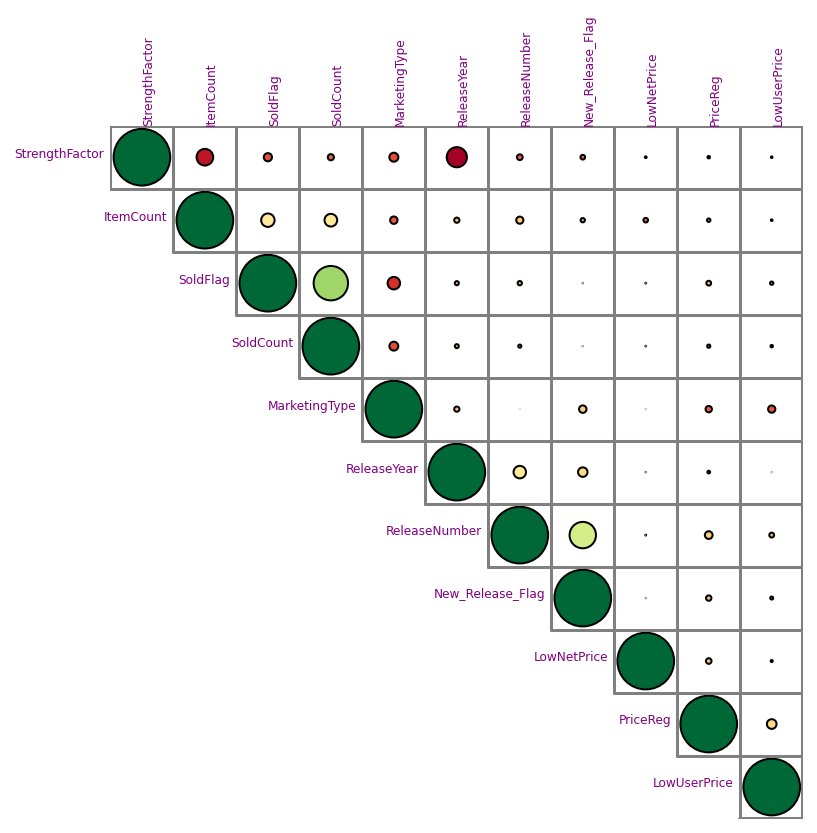

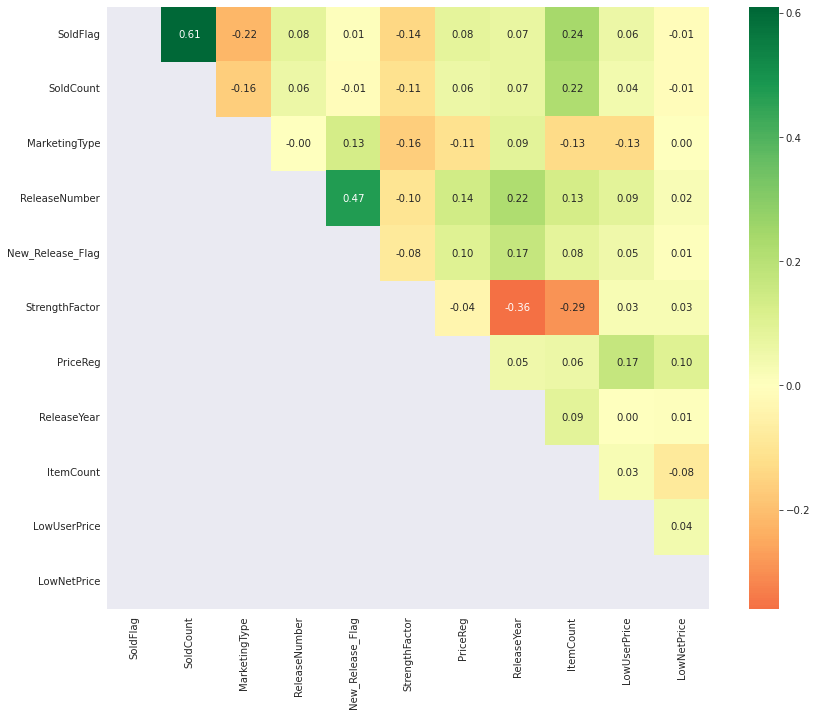

In [ ]:
%pylab inline
import pandas as pd
matplotlib.rcParams['figure.dpi'] = 145
matplotlib.rcParams['figure.figsize'] = (8,6)
from biokit.viz import corrplot
c = corrplot.Corrplot(df_historical)
c.plot(colorbar=False, method='square', shrink=.9 ,rotation=90, upper='circle',grid='grey',
       fontsize=6,label_color='purple',
       cmap='RdYlGn')
plt.show();


matplotlib.rcParams['figure.dpi'] = 72.5

# Calculate pairwise-correlation
matrix = df_historical.corr().round(2)

# Create a mask
mask = np.tril(np.ones_like(matrix, dtype=bool))

# Create a custom divergin palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                            n=9, center="light", as_cmap=True)

plt.figure(figsize=(14, 11))
sns.heatmap(matrix, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap='RdYlGn')

plt.show()

#### Observation :- from corelation matrix, it is clear that soldFlag is highly corelated to soldCount > 0.6

#### Thus soldCount can be dropped as soldFlag function of soldCount, it is redundant.

In [ ]:
df_historical = df_historical.drop(["SoldCount"], axis=1)

In [ ]:
## divide the fields into categorical and numerical
categ_cols = ["ReleaseYear", "MarketingType", "New_Release_Flag","SoldFlag"]
num_cols = ["ReleaseNumber", "StrengthFactor", "PriceReg", "ItemCount", "LowUserPrice", "LowNetPrice"]

In [ ]:
## converting sold flag to 0 or 1 string column instead of float for discrete colour visualization
#df_historical["SoldFlag"] = df_historical["SoldFlag"].astype(str)

#  **Send code to plotly chart_studio**

In [ ]:
!pip install chart_studio
import chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=a6e35ccc5203e29be3021a153a8e7e2079a16be40e2890a66cf6640fd71b0d0e
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [ ]:
## plot the distributions category wise based on the target. 

import chart_studio
chart_studio.tools.set_credentials_file(username="damle.g",api_key="2AJTjwjFd1mrsqa4zVbs")


import chart_studio.plotly as py
import chart_studio.tools as tls

target = 'SoldFlag'
for i in categ_cols : 
  if i != target :
      df = df_historical.value_counts([i,target]).reset_index()
      df = df.rename(columns={0: "frequency"})
      fig = px.bar(df, x=i, y="frequency", color = target, width=800, height=400,
      title="Distribution of "+ i,template="ggplot2")
      py.plot(fig, filename = 'Distribution of categorical feature'+i, auto_open=False)
      fig.show() 




Observation:

1. ReleaseYear - 21st century seem to have more products released
2. Marketing type 1 is with less sold products than 0.
3. Most products have new releases with flag value 1 and out of them very few actually got sold

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username="gauri54dam",api_key="0blXm8AnpIJXEQO2qw6a")


import chart_studio.plotly as py
import chart_studio.tools as tls


## plot distribution and box plots numerical wise based on the target.
for i in num_cols : 

    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
    go.Histogram(x = df_historical[i],name = "Histogram"),
    row=1, col=1)
   
    fig.add_trace(
    go.Box(y = df_historical[i],name = "Boxplot"),
    row=1, col=2)
    
    fig.update_layout(height=400, width=800, title_text="Distribution of "+i, template="ggplot2")
    
    #py.plot(fig, filename = "Distribution of numerical features"+i, auto_open=False)
    fig.show()


#### Observation



1.   Release no - Most of the products have their release numbers < 20.
2.   PriceReg - Most of the products fall under value of 1000.
3.   ItemCount - Item count has some outliers > 1400 but most of values < 800.

LowUserPrice and LowNetPrice are with outliers and distribution is right skewed.
StrengthFactor is having high values as shown in scatter plot below:




In [ ]:
fig = px.histogram(df_historical["StrengthFactor"])
fig.update_layout(height=400, width=1000, title_text="Distribution of StrengthFactor", template="ggplot2")
fig.show()



This value has high range maximum > 6000, this can be scaled before feeding it to ML model.

# **Feature Scaling**

#### For this classification, Random forest and XGboost are used.
#### These decision trees do not require normalization of their inputs; and since XGBoost is essentially an ensemble algorithm comprised of decision trees, it does not require normalization for the inputs either

# **Removing Class Imbalance**

In [ ]:

df_historical.SoldFlag.value_counts()

0.0    63000
1.0    12996
Name: SoldFlag, dtype: int64

#### There are more number of 0 labels than 1 positive labels.

#### Only 17% of data is positively labeled

#### This effects accuracy of model thus f1 score is used which takes in account this imbalance

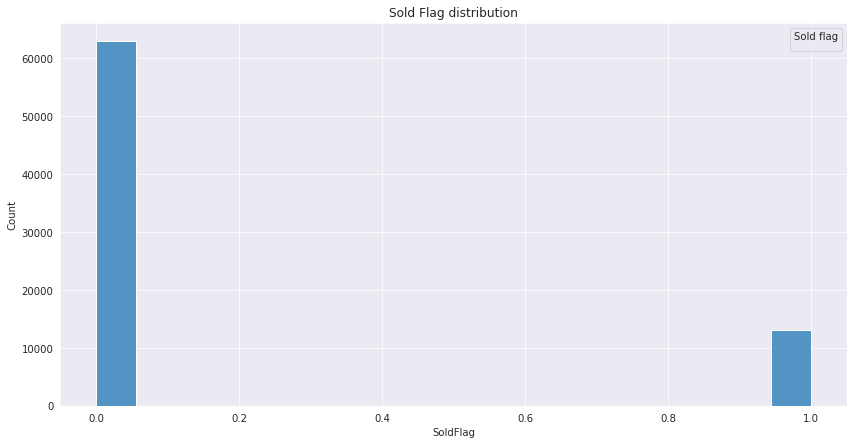

In [ ]:
fig = plt.figure(figsize=(14, 7))
fig.set_dpi=300

plt.title("Sold Flag distribution")
sns.histplot(df_historical.SoldFlag)

plt.legend(title="Sold flag", loc='upper right')
plt.show()

In [ ]:
df_historical_sold_flag_0 = df_historical[df_historical['SoldFlag']==0].sample(n=12996)

In [ ]:
df_historical_sold_flag_1 = df_historical[df_historical['SoldFlag']==1]

In [ ]:
df_historical_sold_flag_0.shape

(12996, 10)

In [ ]:
df_historical_sold_flag_1.shape

(12996, 10)

In [ ]:
df_historical_new = pd.concat([df_historical_sold_flag_0, df_historical_sold_flag_1], axis=0)

In [ ]:
## shuffle the Dataset
df_historical_new = df_historical_new.sample(frac=1.0, random_state=1)

In [ ]:
df_historical_new.shape

(25992, 10)

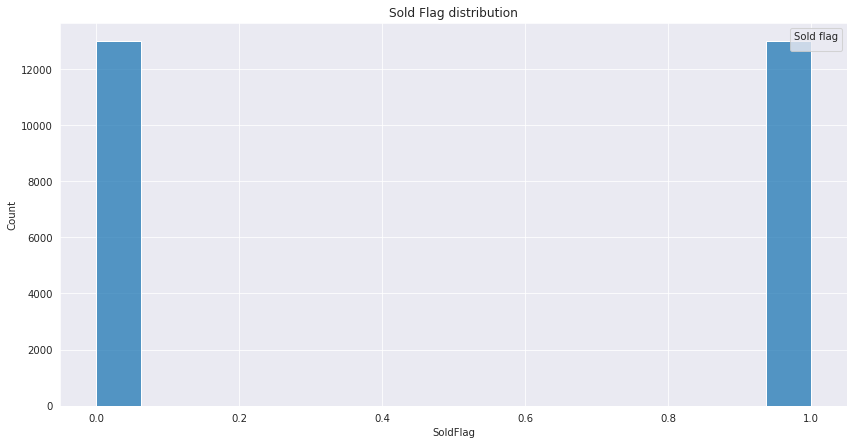

In [ ]:
fig = plt.figure(figsize=(14, 7))
fig.set_dpi=300

plt.title("Sold Flag distribution")
sns.histplot(df_historical_new.SoldFlag)

plt.legend(title="Sold flag", loc='upper right')
plt.show()

In [ ]:
df_historical_new

SoldFlag  MarketingType  ReleaseNumber  New_Release_Flag  \
19209       1.0              0              1                 0   
18930       0.0              0              2                 1   
61275       0.0              1              5                 1   
33283       1.0              0              1                 0   
16633       0.0              0              3                 1   
...         ...            ...            ...               ...   
53407       0.0              1              5                 1   
15559       1.0              0              7                 1   
53655       0.0              1              1                 0   
30074       0.0              0              0                 0   
39846       0.0              1              8                 1   

       StrengthFactor  PriceReg  ReleaseYear  ItemCount  LowUserPrice  \
19209       4391784.0    142.95         2003         30         90.96   
18930       2112361.0     65.00         2006         19         20.95   
61275         83889.0     50.86         2011         11          0.00   
33283        360612.0     39.00         2002         28         52.98   
16633       1216704.0    191.95         2003         52         72.45   
...               ...       ...          ...        ...           ...   
53407       3902878.0      4.00         2006         15         82.68   
15559        313508.0     32.11         2007         29        115.99   
53655         36678.0     56.99         2005         43          0.00   
30074       1736675.0    304.95         2011         37         66.74   
39846        338835.0     72.27         2014         18         56.05   

       LowNetPrice  
19209        16.89  
18930        66.16  
61275        51.86  
33283        73.94  
16633        15.97  
...            ...  
53407         4.00  
15559        81.51  
53655         0.00  
30074        31.52  
39846        54.35  

[25992 rows x 10 columns]

# **Define features and labels**



In [ ]:
y = df_historical['SoldFlag']

In [ ]:
x = df_historical.drop('SoldFlag', axis=1)

In [ ]:
x.shape

(75996, 9)

In [ ]:
y.shape

(75996,)

# **Important Functions**





In [ ]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    endy = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    f1score = round(f1_score(labels, pred), 3)
    print('{} -- Accuracy: {} | Precision: {} | Recall: {} | F1Score: {} | Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   f1score,
                                                                                   round((endy - start)*1000, 1)))

In [ ]:
### k fold cross validation to choose hyper parameters correctly.

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

# **Train Test and Validation split**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
## splitting test dataset in half one for validation tests and other for actual test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

In [ ]:
for dataset in [y_train, y_val, y_test]:
  print(round(len(dataset)/len(y), 2))

0.7
0.15
0.15


In [ ]:
for dataset in [x_train, x_val, x_test]:
  print(len(dataset))

53197
11399
11400


In [ ]:
for dataset in [y_train, y_val, y_test]:
  print(len(dataset))

53197
11399
11400


In [ ]:
print(x_train.shape)

(53197, 9)


In [ ]:
print(x_val.shape)

(11399, 9)


In [ ]:
print(x_test.shape)

(11400, 9)


# **Random Forest**

In [ ]:
rf = RandomForestClassifier()
parameters = {
      'n_estimators': [5, 50, 250],
      'max_depth': [2, 4, 8, 16, 32, None]
}

rf_model = GridSearchCV(rf, parameters, cv=5)
rf_model.fit(x_train, y_train)

print_results(rf_model)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.829 (+/-0.0) for {'max_depth': 2, 'n_estimators': 5}
0.829 (+/-0.0) for {'max_depth': 2, 'n_estimators': 50}
0.829 (+/-0.0) for {'max_depth': 2, 'n_estimators': 250}
0.833 (+/-0.001) for {'max_depth': 4, 'n_estimators': 5}
0.832 (+/-0.002) for {'max_depth': 4, 'n_estimators': 50}
0.832 (+/-0.001) for {'max_depth': 4, 'n_estimators': 250}
0.834 (+/-0.001) for {'max_depth': 8, 'n_estimators': 5}
0.835 (+/-0.003) for {'max_depth': 8, 'n_estimators': 50}
0.836 (+/-0.002) for {'max_depth': 8, 'n_estimators': 250}
0.821 (+/-0.003) for {'max_depth': 16, 'n_estimators': 5}
0.834 (+/-0.002) for {'max_depth': 16, 'n_estimators': 50}
0.835 (+/-0.002) for {'max_depth': 16, 'n_estimators': 250}
0.809 (+/-0.002) for {'max_depth': 32, 'n_estimators': 5}
0.832 (+/-0.003) for {'max_depth': 32, 'n_estimators': 50}
0.833 (+/-0.002) for {'max_depth': 32, 'n_estimators': 250}
0.807 (+/-0.004) for {'max_depth': None, 'n_estimators': 5}
0.832 (+/-0.003) f

#### Hyper parameter tuning with 5 fold cross validation using GridsearchCV

In [ ]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=250)

In [ ]:
evaluate_model('RF', rf_model, x_val, y_val)

RF -- Accuracy: 0.842 | Precision: 0.687 | Recall: 0.129 | F1Score: 0.218 | Latency: 348.7ms


In [ ]:
evaluate_model('RF', rf_model, x_test, y_test)

RF -- Accuracy: 0.836 | Precision: 0.646 | Recall: 0.111 | F1Score: 0.189 | Latency: 353.5ms


In [ ]:
cf_matrix_rf = confusion_matrix(y_test, rf_model.predict(x_test))

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username="gauri54dam",api_key="0blXm8AnpIJXEQO2qw6a")


import chart_studio.plotly as py
import chart_studio.tools as tls
pio.templates.default = "simple_white"

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 600
px.defaults.height = 400

fig = px.density_heatmap(cf_matrix_rf, x=y_test, y= rf_model.predict(x_test),  template="seaborn")
py.plot(fig, filename = "Confusion matrix", auto_open=False)
fig.show()

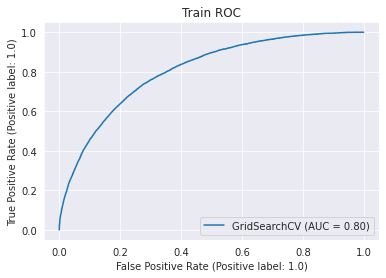

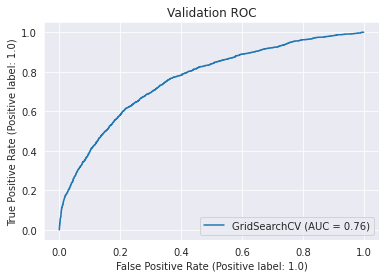

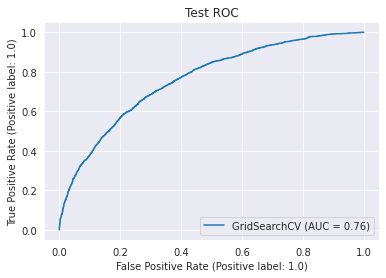

In [ ]:
plot_roc_curve(rf_model, x_train, y_train)
plt.title("Train ROC")
plt.show()
plot_roc_curve(rf_model, x_val, y_val)
plt.title("Validation ROC")
plt.show()
plot_roc_curve(rf_model, x_test, y_test)
plt.title("Test ROC")
plt.show()

# **XGboost**

In [ ]:
gb = xgb.XGBClassifier(objective='binary:logistic')
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

boosting_model = GridSearchCV(gb, parameters, cv=5)
boosting_model.fit(x_train, y_train)

print_results(boosting_model)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}

0.829 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.829 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.829 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.829 (+/-0.0) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.831 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.833 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.834 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.835 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.833 (+/-0.002) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.834 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.835 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.836 (+/-0.003) for {'learning_rate': 0.

In [ ]:
boosting_model.best_estimator_

XGBClassifier(n_estimators=250)

In [ ]:
evaluate_model('Boosting', boosting_model, x_val, y_val)

Boosting -- Accuracy: 0.842 | Precision: 0.645 | Recall: 0.151 | F1Score: 0.245 | Latency: 120.9ms


In [ ]:
evaluate_model('Boosting', boosting_model, x_test, y_test)

Boosting -- Accuracy: 0.836 | Precision: 0.611 | Recall: 0.135 | F1Score: 0.221 | Latency: 106.8ms


In [ ]:
cf_matrix_boosting = confusion_matrix(y_test, boosting_model.predict(x_test))

In [ ]:
import chart_studio
chart_studio.tools.set_credentials_file(username="gauri54dam",api_key="0blXm8AnpIJXEQO2qw6a")


import chart_studio.plotly as py
import chart_studio.tools as tls


pio.templates.default = "simple_white"

px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Blackbody
px.defaults.width = 600
px.defaults.height = 400

fig = px.density_heatmap(cf_matrix_boosting, x=y_test, y= boosting_model.predict(x_test),  template="seaborn")
py.plot(fig, filename = "Confusion matrix", auto_open=False)
fig.show()

In [ ]:
plot_roc_curve(boosting_model, x_train, y_train)
plt.title("Train ROC")
plt.show()
plot_roc_curve(boosting_model, x_val, y_val)
plt.title("Validation ROC")
plt.show()
plot_roc_curve(boosting_model, x_test, y_test)
plt.title("Test ROC")
plt.show()

# **Information Extraction and Model comparison**

The Model accuracy comparison:


1. Random Forest - 83%
2. XGboost - 84%



---




Random Forest

RF is ensemble model which combines the outputs of multiple trees running model independently.
RF models unline SVM and LR can be used for both categorical and continuous target variables. It trains fast but predictions is slow. 

It gives best accuracy with complex and messy data. 

Using gridsearch cv the best performing hyperparameters are selected. **`RandomForestClassifier(max_depth=8, n_estimators=250)`**



---

Boosting - XG boosting tree.

Boosting and RF are ensemble models which combine the outputs of multiple models.

It can handle complex models like RF. It has faster prediction time so faster than RF. But as each tree is sequentially learning from previous model mistakes it has slow trainigng time.

Using gridsearch cv the best performing hyperparameters are selected.
**`XGBClassifier(n_estimators=250) `**

---




Using hyperparameter tuning of models RF and boosting it can be seen that Random Forest does better with few, deep trees, and Boosted Trees does better with many, shallow trees.


# **Conclusion**

A retail firm which has many products in their inventory, but very few of them tend to sell (only about 10% sell each year) and many of the products only have a single sale in the course of a year.

From the classifier, the sales, growth and analytics team of the retail firm can determine which products from their inventory should they retain to sell and the ones to discard.

